# **Clase 4 - Solución numérica de ecuaciones diferenciales con Python**

## Temas

- La librería SciPy para cómputo científico
- Uso de "odeint" para integrar y resolver ecuaciones diferenciales con Python
- Ecuacion de Lotka-Volterra


# La librería Scipy 

#### Hasta ahora, hemos aprendido a plantear ecuaciones diferenciales para modelar problemas biológicos sencillos. También repasamos métodos básicos para resolver las ecuaciones diferenciales de forma *analítica* (a mano). Sin embargo, los sistemas y circuitos que vamos a ver en lo que resta de la clase son más complejos.

#### Por esa razón, hoy aprenderemos a usar una librería para resolver ecuaciones diferenciales con Python llamada **Scipy** (Scientific Python)

#### Veamos un ejemplo sencillo sobre el crecimiento de bacterias que aprendimos a resolver en la primera clase:

$$\frac{dX}{dt} = kX(t)$$ 

#### Donde X es el número de bacterias en el tiempo y k es la constante de la tasa de crecimiento

#### Primero, vamos a importar las librerías de Python que necesitamos para resolver la ecuación diferencial

In [1]:
# Importemos Numpy para hacer cálculos numéricos
import numpy as np

# Ahora importemos Matplotlib para hacer gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Finalmente, importemos la función "odeint" para integrar ecuaciones diferenciales
from scipy.integrate import odeint

#### Ahora, vamos a definir una funcion llamada **modelo** de la misma manera que definimos funciones en Python. Esta función **calcula el valor de la derivada de X en tiempo t**

In [2]:
# Define una función llamado modelo que recibe como entradas los valores de X, t, y k
# La función debe regresar el valor de dX/dt en tiempo t
def modelo(X,t,k):
    dXdt = k * X
    return dXdt

#### Supongamos que en un principio hay 50 bacterias en el cultivo y que la tasa de crecimiento k es de 0.2/hora. Veamos cuánto crecen las bacterias en 24 horas. Cuando resolvemos una ecuación diferencial, lo que buscamos es encontrar el valor de $X(t)$ dado $\frac{dX}{dt}$. Para encontrar el valor de $X(t)$ con Scipy, necesitamos hacer lo siguiente:

In [20]:
X0 = 50.0 # Condición inicial
k = 0.2 # Tasa de crecimiento
paso = 5
tiempo = np.linspace(0,24,paso) # Tiempo de la simulación (un dia o 24 horas)

In [21]:
Xsolucion = odeint(modelo, X0, tiempo, args=(k,))

In [22]:
len(tiempo)

5

#### Lo que la función "odeint" hace es calcular todos los valores de X a partir de las derivadas calculadas para cada valor del vector "tiempo" usando la funcion "modelo" que definimos

#### Hagamos una gráfica de X para confirmar que la solución es correcta

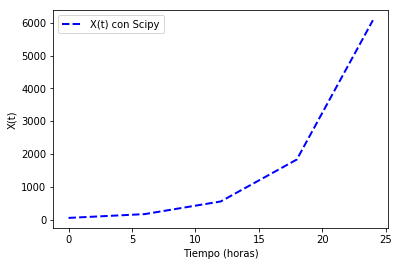

In [23]:
plt.plot(tiempo,Xsolucion,'b--',linewidth=2,label='X(t) con Scipy')
plt.xlabel('Tiempo (horas)')
plt.ylabel('X(t)')
plt.legend()

#### Comparemos esta solución numérica con la solución analítica la cual es:

$$X(t) = 50e^{0.2t}$$

In [27]:
X_analitica = X0*np.exp(k*tiempo_analitica) # Esta es la solucion analitica de la ecuacion diferencial

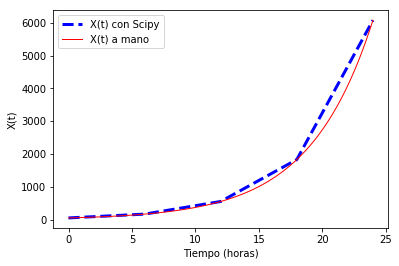

In [28]:
# Grafiquemos ambas soluciones para ver cuanto se parecen
tiempo_analitica = np.linspace(0,24,100)
plt.plot(tiempo,Xsolucion,'b--',linewidth=3,label='X(t) con Scipy')
plt.plot(tiempo_analitica,X_analitica,'r-',linewidth=1,label='X(t) a mano')
plt.xlabel('Tiempo (horas)')
plt.ylabel('X(t)')
plt.legend()

# Ejemplo 1

#### Recordemos de la clase anterior que la ED para calcular la concentracion de mRNA de un gen es

$$\frac{d[mRNA]}{dt}= \beta_m - \alpha_m[mRNA]$$

#### Supongamos que $\beta_m = 2$ (en unidades de moleculas de mRNA/minuto) y que $\alpha_m = 0.5$ (en unidades de degradacion por minuto). Comenzando con cero moleculas de mRNA, resolvamos esta ecuacion para saber cuanto mRNA de dicho gen hay despues de media hora

In [29]:
# Define una función del modelo
def modelo_mRNA(M,t,Beta,alpha):
    dMdt = Beta - (alpha * M)
    return dMdt

In [30]:
M0 = 0.0 # Condición inicial
B = 2.0 # Tasa de transcription de mRNA
a = 0.5 # Tasa de degradacion de mRNA
pasos = 500
tiempo = np.linspace(0,30,pasos) # Tiempo de la simulación (media hora)

In [31]:
Msolucion = odeint(modelo_mRNA, M0, tiempo, args=(B,a))

In [33]:
Msolucion2 = odeint(modelo_mRNA, M0, tiempo, args=(5,1))

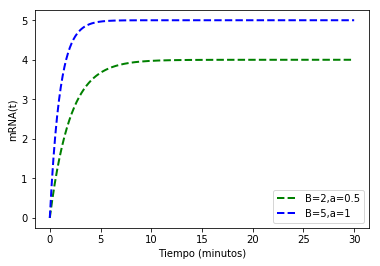

In [34]:
plt.plot(tiempo,Msolucion,'g--',linewidth=2,label='B=2,a=0.5')
plt.plot(tiempo,Msolucion2,'b--',linewidth=2,label='B=5,a=1')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('mRNA(t)')
plt.legend()

## Nota interesante

#### Podemos ver que la concentracion de mRNA alcanza un maximo de 4 moleculas despues de pasado mucho tiempo. Recordemos que la clase pasada demostramos que, en estado estable (cuando la concentracion de mRNA ya no cambia), la concentracion de mRNA esta dada por:

$$\frac{d[mRNA]}{dt} = 0 = \beta_m - \alpha_m[mRNA]$$

$$[mRNA]_{estable} = \frac{\beta_m}{\alpha_m}$$

#### Lo cual es cierto en nuestro ejemplo de arriba, ya que

$$[mRNA]_{estable} = \frac{2}{0.5} = 4$$

# Ejemplo 2

#### Sabiendo la concentración (en estado estable) de mRNA de un gen, podemos calcular la concentración de la proteína que el gen codifica en la traducción. De la clase anterior, la ED para calcular la concentracion de proteína está dada por

$$\frac{d[proteina]}{dt}= \beta_p[mRNA] - \alpha_p[proteina]$$

#### Supongamos que $\beta_p = 1$ (en unidades de moleculas de proteina/minuto) y que $\alpha_p = 0.1$ (en unidades de degradacion por minuto). Comenzando con cero moleculas de proteina, resolvamos esta ecuacion para saber cuanta proteina hay despues de pasada una hora

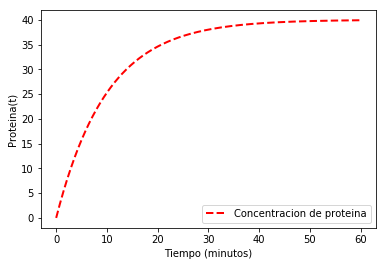

In [35]:
# Define una función del modelo
def modelo_proteina(P,t,M,Beta,alpha):
    dPdt = Beta*M - (alpha * P)
    return dPdt

P0 = 0.0 # Condición inicial
Mestable = 4.0 # Condicion inicial obtenida anteriormente
B = 1.0 # Tasa de traducción de proteína
a = 0.1 # Tasa de degradacion de proteína
pasos = 500
tiempo = np.linspace(0,60,pasos) # Tiempo de la simulación (una hora)

Psolucion = odeint(modelo_proteina, P0, tiempo, args=(Mestable,B,a))

plt.plot(tiempo,Psolucion,'r--',linewidth=2,label='Concentracion de proteina')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Proteina(t)')
plt.legend()

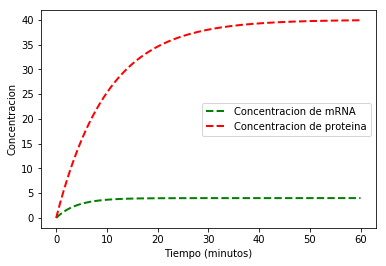

In [36]:
plt.plot(tiempo,Msolucion,'g--',linewidth=2,label='Concentracion de mRNA')
plt.plot(tiempo,Psolucion,'r--',linewidth=2,label='Concentracion de proteina')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Concentracion')
plt.legend()

## Nota interesante

#### De la misma manera que en el ejemplo anterior, podemos ver que la concentracion de proteina alcanza un maximo de 40 moleculas despues de pasado mucho tiempo. Recordemos que la clase pasada demostramos que, en estado estable (cuando la concentracion de proteina ya no cambia), la concentracion de proteina esta dada por:

$$\frac{d[proteina]}{dt} = 0 = \beta_p[mRNA_{estable}] - \alpha_p[proteina]$$

$$[mRNA]_{estable} = \frac{\beta_m}{\alpha_m}$$

$$[proteina]_{estable} = \frac{\beta_p\beta_m}{\alpha_p\alpha_m}$$

#### Lo cual es cierto en nuestro ejemplo de arriba, ya que

$$[proteina]_{estable} = \frac{1\times2}{0.1\times0.5} = 40$$

# Sistemas de ecuaciones diferenciales

#### En los ejemplos anteriores, resolvimos las ecuaciones de mRNA y de proteina *por separado*. Sin embargo, la transcripción y la traducción toman lugar **casi simultáneamente** en la célula. Por ello, para obtener una respuesta más precisa de la dinámica de concentración de mRNA y proteína en la célula, necesitamos resolver ambas ecuaciones como un sistema de ecuaciones y no individualmente.

#### En el siguiente ejemplo, veremos cómo se hace esto con Scipy. Primero, definimos una funcion que contiene las dos ecuaciones diferenciales de mRNA y proteina:

$$\frac{d[mRNA]}{dt}= \beta_m - \alpha_m[mRNA]$$

$$\frac{d[proteina]}{dt}= \beta_p[mRNA] - \alpha_p[proteina]$$


In [41]:
# Define la funcion del sistema de ecuaciones
def modelo_sistema(condiciones_iniciales, t, Betas, alphas):
    
    # Primero, define las condiciones iniciales
    # Nota que la variable "condiciones_iniciales" es una LISTA con dos valores: [mRNA_inicial, p_inicial]
    m_i = condiciones_iniciales[0]
    p_i = condiciones_iniciales[1]
    
    # Define las Betas y las alphas
    # Nota que la variable "Betas" es una LISTA con dos valores: [Beta_m, Beta_p]
    B_m = Betas[0]
    B_p = Betas[1]
    
    # Nota que la variable "alphas" es una LISTA con dos valores: [alpha_m, alpha_p]
    a_m = alphas[0]
    a_p = alphas[1]
    
    # Ahora definimos las ecuaciones diferenciales de mRNA (representado por M) y de proteina (representado por P)
    dMdt = B_m - (a_m * m_i)
    dPdt = (B_p * m_i) - (a_p * p_i)
    
    # Por ultimo, vamos a crear una lista con los dos valores calculados de dMdt y dPdt
    resultado = [dMdt, dPdt]
    return resultado

#### Ahora, para resolver este sistema de ecuaciones, necesitamos definir:

* Una lista que contenga las dos condiciones iniciales de mRNA y de proteina
* Un vector que contenga los valores del tiempo de la simulacion (de 0 a 30 minutos)
* Una lista que contenga los dos valores de Beta ($\beta_m$ y $\beta_p$)
* Una lista que contenga los dos valores de alpha ($\alpha_m$ y $\alpha_p$)
* Un vector que contenga los valores de la solucion de la concentracion de mRNA
* Un vector que contenga los valores de la solucion de la concentracion de proteina

#### Tambien necesitamos hacer un ciclo FOR para calcular las derivadas *paso a paso*

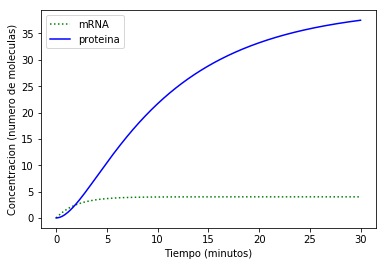

In [47]:
# Crea una lista con condiciones iniciales
ci = [0,0] # Cero moleculas de mRNA y cero de proteina

# Crea una lista con los valores de Betas y alphas que definimos arriba
betas = [2,1]
alphas = [0.5,0.1]

# Define el numero de pasos
n = 500

# Vector del tiempo (en minutos) con n valores (pasos)
tiempo = np.linspace(0,30,n)

# Crea un vector vacio para guardar los valores calculados de mRNA (M) y proteina (P)
M = np.empty_like(tiempo)
P = np.empty_like(tiempo)

# Registra las condiciones iniciales
M[0] = ci[0]
P[0] = ci[1]

# Resuelve el sistema de EDO paso a paso con un ciclo FOR
for i in range(1,len(tiempo)):
    # Iniciamos el iterador en 1 porque el valor 0 ya lo definimos arriba
    # Define el tamano del paso en el tiempo
    tpaso = [tiempo[i-1],tiempo[i]]
    # Resuelve la ecuacion diferencial en el tiempo que abarca el paso
    z = odeint(modelo_sistema,ci,tpaso,args=(betas,alphas))
    # La variable "z" captura los valores de mRNA y proteina en dos puntos en el tiempo:
    # Estos dos valores en el tiempo son los que estan dentro de "tpaso"
    
    # Ahora guardamos la solucion nueva para luego graficarla
    M[i] = z[1][0]
    P[i] = z[1][1]
    # Actualizamos las condiciones iniciales con los valores nuevos que acabamos de calcular
    ci = z[1]

# Graficamos los resultados
plt.plot(tiempo,M,'g:',label='mRNA')
plt.plot(tiempo,P,'b-',label='proteina')
plt.ylabel('Concentracion (numero de moleculas)')
plt.xlabel('Tiempo (minutos)')
plt.legend()

#### Hagamos un acercamiento a la grafica para ver mejor lo que sucede en los primeros 3 minutos

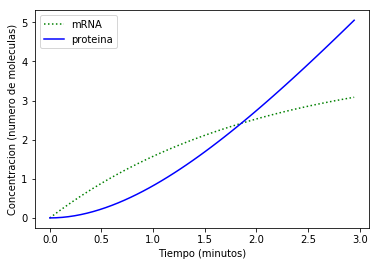

In [48]:
# Graficamos los resultados
plt.plot(tiempo[tiempo<=3],M[tiempo<=3],'g:',label='mRNA')
plt.plot(tiempo[tiempo<=3],P[tiempo<=3],'b-',label='proteina')
plt.ylabel('Concentracion (numero de moleculas)')
plt.xlabel('Tiempo (minutos)')
plt.legend()

# Ejemplo 3

#### Utiliza Scipy para resolver el siguiente sistema de ecuaciones diferenciales

$$\frac{dx}{dt} = 2x - 3y$$

$$\frac{dy}{dt} = y - 2x$$

#### Sujeto a las condiciones iniciales

$$x(0) = 8$$

$$y(0) = 3$$

In [49]:
# Define la funcion del sistema de ecuaciones
def modelo_sistema_Ej3(condiciones_iniciales, t):
    
    # Primero, define las condiciones iniciales
    # Nota que la variable "condiciones_iniciales" es una LISTA con dos valores: [x0, y0]
    x_i = condiciones_iniciales[0]
    y_i = condiciones_iniciales[1]
    
    # Ahora definimos las ecuaciones diferenciales de "x" e "y"
    dxdt = (2.0 * x_i) - (3.0 * y_i)
    dydt = y_i - (2.0 * x_i)
    
    # Por ultimo, vamos a crear una lista con los dos valores calculados de dxdt y dydt
    resultado = [dxdt, dydt]
    return resultado

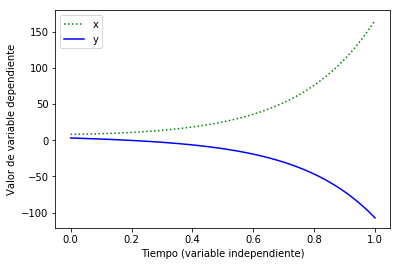

In [50]:
# Crea una lista con condiciones iniciales
ci = [8,3]

# Vector del tiempo 
tiempo = np.linspace(0,1)

# Crea un vector vacio para guardar los valores calculados de "x" e "y"
x = np.empty_like(tiempo)
y = np.empty_like(tiempo)

# Registra las condiciones iniciales
x[0] = ci[0]
y[0] = ci[1]

# Resuelve el sistema de EDO paso a paso con un ciclo FOR

for i in range(1,len(tiempo)): # Iniciamos el iterador en 1 porque el valor 0 ya lo definimos arriba
    # Define el tamano del paso en el tiempo
    tpaso = [tiempo[i-1],tiempo[i]]
    # Resuelve la ecuacion diferencial en el tiempo que abarca el paso
    z = odeint(modelo_sistema_Ej3,ci,tpaso,args=())
    
    # Ahora guardamos la solucion nueva para luego graficarla
    x[i] = z[1][0]
    y[i] = z[1][1]
    # Actualizamos las condiciones iniciales con los valores nuevos que acabamos de calcular
    ci = z[1]

# Graficamos los resultados
plt.plot(tiempo,x,'g:',label='x')
plt.plot(tiempo,y,'b-',label='y')
plt.ylabel('Valor de variable dependiente')
plt.xlabel('Tiempo (variable independiente)')
plt.legend()

# Solución analitica

$$x(t) = 5e^{-t} + 3e^{4t}$$

$$y(t) = 5e^{-t} - 2e^{4t}$$

In [ ]:
x_test = 5*np.exp(-tiempo) + 3*np.exp(4*tiempo)
y_test = 5*np.exp(-tiempo) - 2*np.exp(4*tiempo)
# Graficamos los resultados
plt.plot(tiempo,x_test,'g:',label='x')
plt.plot(tiempo,y_test,'b-',label='y')
plt.ylabel('Valor de variable dependiente')
plt.xlabel('Tiempo (variable independiente)')
plt.legend()

# Ejemplo 4 - Ecuaciones de Lotka-Volterra para poblaciones de depredador y presa

#### Este sistema es muy famoso en ecología y otras áreas de biología. Tenemos el sistema de ecuaciones siguiente:

$$\frac{dx}{dt} = x(a - by)$$

$$\frac{dy}{dt} = y(-c + dx)$$

#### Donde $x$ es la población de zebras (la presa) mientras que $y$ es la población de leones (los depredadores). Las constantes $a,b,c,d$ sirven para representar que tan rapido se reproducen y mueren ambas poblaciones

#### Discusión en clase:

* ¿Qué significan las constantes a, b, c y d?

#### Existen varios escenarions (estados) para las poblaciones de zebras y leones:

1. La población de ambos animales es pequeña.
2. Si hay pocos leones $(0 < y << x)$, entonces las zebras pueden reproducirse (crecer en número) porque ya no hay muchos depredadores que las amenacen. Por lo que $x$ aumenta su valor.
3. Cuando el número de zebras comienza a incrementarse a falta de leones, los pocos leones que hay tienen mucha comida a su disposición y por ende pueden cazar a las zebras y reproducirse. Por lo que $x$ decae pero $y$ comienza a aumentar su valor
4. El decremento en el número de zebras reduce la comida disponible de los leones, por lo que éstos comienzan a morir a falta de comida. Con pocos leones y pocas zebras, regresamos al estado número 1

#### Resolvamos este sistema de ecuaciones con Scipy y veamos cómo se ven las poblaciones de zebras y leones en el tiempo. Usaremos los siguientes valores:

$$x(0) = 4$$
$$y(0) = 4$$
$$a = 4$$
$$b = 2$$
$$c = d = 3$$

#### Donde las unidades de $x$ e $y$ son [decenas de animales]

In [51]:
# Define la funcion del sistema de ecuaciones
def modelo_lotka_volterra(condiciones_iniciales, t, constantes_abcd):
    
    # Primero, define las condiciones iniciales
    # Nota que la variable "condiciones_iniciales" es una LISTA con dos valores: [x0, y0]
    x_i = condiciones_iniciales[0]
    y_i = condiciones_iniciales[1]
    
    # Ahora definimos los valores de a,b,c,d
    # Nota que la variable "constantes_abcd" es una LISTA con los cuatro valores: [a, b, c, d]
    a = constantes_abcd[0]
    b = constantes_abcd[1]
    c = constantes_abcd[2]
    d = constantes_abcd[3]
    
    # Ahora definimos las ecuaciones diferenciales de "x" e "y"
    dxdt = x_i*(a - (b*y_i))
    dydt = y_i*(-c + (d*x_i))
    
    # Por ultimo, vamos a crear una lista con los dos valores calculados de dxdt y dydt
    resultado = [dxdt, dydt]
    return resultado

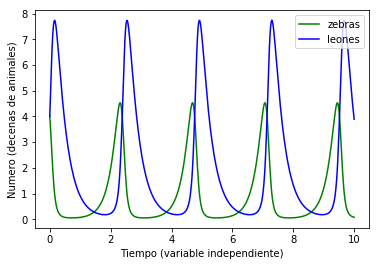

In [52]:
# Crea una lista con condiciones iniciales [x0,y0]
ci = [4.0,4.0]

# Define el numero de pasos
n = 500

# Vector del tiempo con n valores de 0 a 10
tiempo = np.linspace(0.0,10.0,n)

# Crea un vector vacio para guardar los valores calculados de "x" e "y"
x = np.empty_like(tiempo)
y = np.empty_like(tiempo)

# Registra las condiciones iniciales
x[0] = ci[0]
y[0] = ci[1]

# Define la lista con los valores de a,b,c,d
lista_abcd = [4.0,2.0,3.0,3.0]

# Resuelve el sistema de EDO paso a paso con un ciclo FOR

for i in range(1,len(tiempo)): # Iniciamos el iterador en 1 porque el valor 0 ya lo definimos arriba
    # Define el tamano del paso en el tiempo
    tpaso = [tiempo[i-1],tiempo[i]]
    # Resuelve la ecuacion diferencial en el tiempo que abarca el paso
    z = odeint(modelo_lotka_volterra,ci,tpaso,args=(lista_abcd,))
    
    # Ahora guardamos la solucion nueva para luego graficarla
    x[i] = z[1][0]
    y[i] = z[1][1]
    # Actualizamos las condiciones iniciales con los valores nuevos que acabamos de calcular
    ci = z[1]

# Graficamos los resultados
plt.plot(tiempo,x,'g-',label='zebras')
plt.plot(tiempo,y,'b-',label='leones')
plt.ylabel('Numero (decenas de animales)')
plt.xlabel('Tiempo (variable independiente)')
plt.legend()

# Ejercicio en clase

### Resuelve el siguiente sistema de ecuaciones diferenciales con Scipy

$$\frac{dX}{dt} = \alpha_XX - \frac{\beta_Y}{1 + \frac{Y^n}{K_Y^n}}$$

$$\frac{dY}{dt} = \frac{\beta_XX^n}{K_X^n + X^n} - \alpha_YY$$

#### Considera los siguientes valores

- $t = [0.0,...,20.0]$ (variable independiente)
- $pasos = 1000$
- $n = 3$ (exponente de Hill)
- $\beta_X = 5$
- $\beta_Y = 1$
- $K_X = 0.9$
- $K_Y = 1.5$
- $\alpha_X = 0.2$
- $\alpha_Y = 0.1$
- $X(0) = 2$
- $Y(0) = 0$

In [53]:
# Define la funcion del sistema de ecuaciones
def modelo_hill_autorepresion(condiciones_iniciales, t, Betas, alphas, Ks):
    n_hill = 3.0
    x_i = condiciones_iniciales[0]
    y_i = condiciones_iniciales[1]
    Bx = Betas[0]
    By = Betas[1]
    ax = alphas[0]
    ay = alphas[1]
    Kx = Ks[0]
    Ky = Ks[1]
    dXdt = (ax * x_i) - (By/(1 + (y_i**n_hill)/(Ky**n_hill)))
    dYdt = ((Bx * x_i**n_hill)/(Kx**n_hill + x_i**n_hill)) - ay*y_i
    resultado = [dXdt,dYdt]
    return resultado

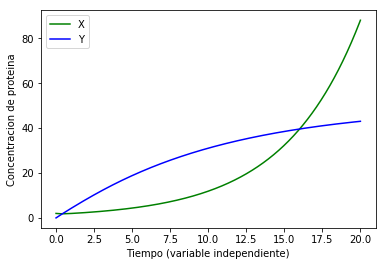

In [56]:
# Crea una lista con condiciones iniciales [x0,y0]
ci = [2.0,0.0]

# Define el numero de pasos
n = 1000

# Vector del tiempo con n valores de 0 a 50
tiempo = np.linspace(0.0,20.0,n)

# Crea un vector vacio para guardar los valores calculados de "x" e "y"
X = np.empty_like(tiempo)
Y = np.empty_like(tiempo)

# Registra las condiciones iniciales
X[0] = ci[0]
Y[0] = ci[1]

# Define la lista con los valores de Betas, alphas, y Ks
B = [5.0,1.0]
a = [0.2,0.1]
k = [0.9,1.5]

# Resuelve el sistema de EDO paso a paso con un ciclo FOR

for i in range(1,len(tiempo)): # Iniciamos el iterador en 1 porque el valor 0 ya lo definimos arriba
    # Define el tamano del paso en el tiempo
    tpaso = [tiempo[i-1],tiempo[i]]
    # Resuelve la ecuacion diferencial en el tiempo que abarca el paso
    z = odeint(modelo_hill_autorepresion,ci,tpaso,args=(B,a,k,))
    
    # Ahora guardamos la solucion nueva para luego graficarla
    X[i] = z[1][0]
    Y[i] = z[1][1]
    # Actualizamos las condiciones iniciales con los valores nuevos que acabamos de calcular
    ci = z[1]

# Graficamos los resultados
plt.plot(tiempo,X,'g-',label='X')
plt.plot(tiempo,Y,'b-',label='Y')
plt.ylabel('Concentracion de proteina')
plt.xlabel('Tiempo (variable independiente)')
plt.legend()